# Comparing Different Estimators

In [48]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
X_train = pd.read_csv('Train/trainVectors.csv', header=None).transpose()
y_train = pd.read_csv('Train/trainLbls.csv', header=None, names=['label'])['label']

X_validation = pd.read_csv('Validation/valVectors.csv', header=None).transpose()
y_validation = pd.read_csv('Validation/valLbls.csv', header=None, names=['label'])['label']

#X_train_val = pd.concat([X_train, X_validation]).reset_index(drop=True)
#y_train_val = pd.concat([y_train, y_validation]).reset_index(drop=True)['label']

X_test = pd.read_csv('Test/testVectors.csv', header=None).transpose()

In [5]:
n_jobs = -1
# Test Score: 0.73641
rfc = RandomForestClassifier(
    criterion="gini",
    max_depth=25,
    max_features="sqrt",
    n_estimators=400,
    n_jobs=n_jobs
)

# Test Score: 0.73352
etc = ExtraTreesClassifier(
  max_depth=None,
  max_features=0.3,
  n_estimators=200,
  n_jobs=n_jobs
)

# Test Score: 0.77861
svm = SVC(C=10, gamma=0.0001, kernel="rbf")

# Test Score: 0.76878
ridge = RidgeClassifier(alpha=580) 

# Test Score: 0.76184
ridge_bag = BaggingClassifier(
  RidgeClassifier(alpha=440),
  max_samples=0.8,
  n_jobs=n_jobs
)

In [20]:
estimators = [
    ('Random Forest', rfc), 
    ('Extra Trees ', etc), 
    ('SVM ', svm), 
    ('Ridge ', ridge),
    ('Ridge (80% samples) ', ridge_bag)
]

In [26]:
data = []
for name, estimator in estimators:
    start_time = time.time()
    print('Fitting {}...'.format(name))
    estimator.fit(X_train, y_train)
    fit_time = time.time() - start_time
    print(' - {} seconds...'.format(int(fit_time)))
    print('Predicting using {}...'.format(name))
    start_time = time.time()
    pred = estimator.predict(X_validation)
    predict_time = time.time() - start_time
    print(' - {} seconds...'.format(int(predict_time)))
    precisions, recalls, f1_scores, supports = precision_recall_fscore_support(pred, y_validation)
    data.append({
        'name': name, 
        'precisions': precisions, 
        'recalls': recalls, 
        'f1_scores': f1_scores
    })

Fitting Random Forest...
 - 23 seconds...
Predicting using Random Forest...
 - 0 seconds...
Fitting Extra Trees ...
 - 155 seconds...
Predicting using Extra Trees ...
 - 0 seconds...
Fitting SVM ...
 - 76 seconds...
Predicting using SVM ...
 - 56 seconds...
Fitting Ridge ...
 - 3 seconds...
Predicting using Ridge ...
 - 0 seconds...
Fitting Ridge (80% samples) ...
 - 33 seconds...
Predicting using Ridge (80% samples) ...
 - 2 seconds...


In [44]:
def plot_results(data, result_type='f1_scores'):
    fig, ax = plt.subplots(figsize=(15,7))
    labels = np.arange(1, 30)
    ax.set_xlabel('Label')
    ax.set_ylabel('F1 score')
    
    ax.grid(color='#eeeeee', linestyle='-', linewidth=2)
    ax.set_xticks(np.arange(0, len(labels)+1, 1))
    ax.set_xlim(0, len(labels)+1)
    ax.set_ylim(0, 1)

    for item in data:
        name = item['name']
        precisions = item[result_type]
        ax.plot(labels, item[result_type], '-', label=name)
    ax.legend()

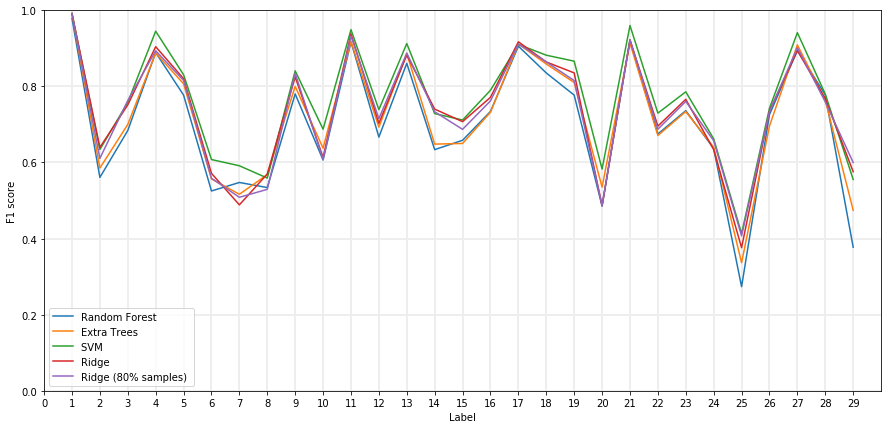

In [45]:
plot_results(data, 'f1_scores')

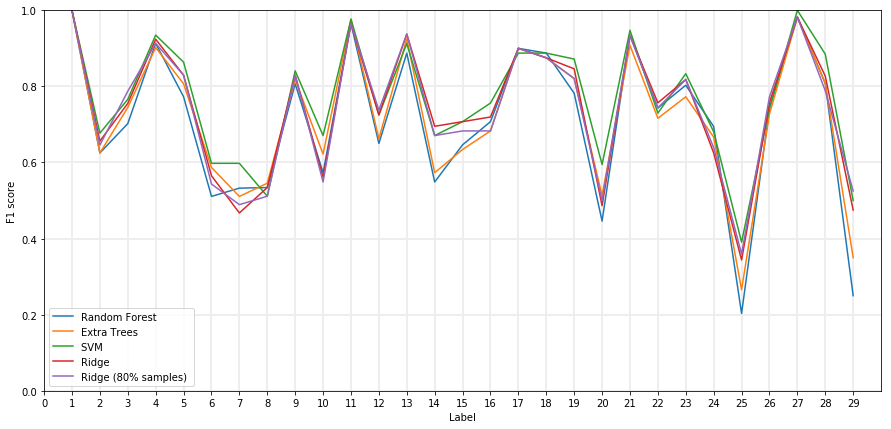

In [46]:
plot_results(data, 'precisions')

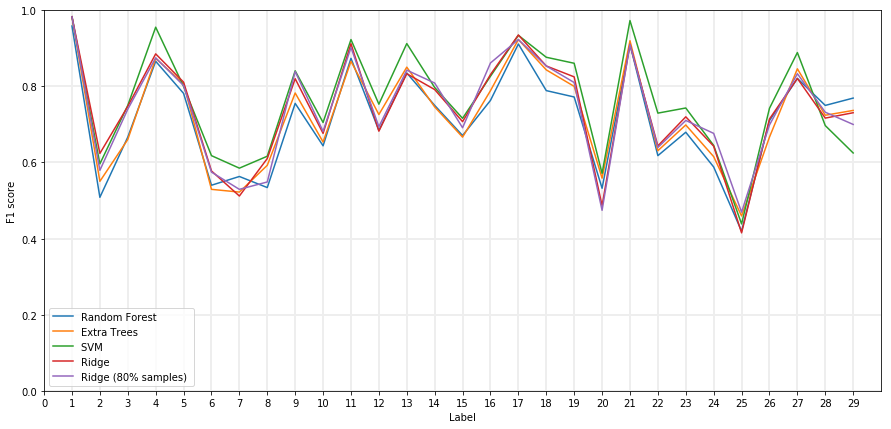

In [47]:
plot_results(data, 'recalls')

In [58]:
estimator = Pipeline([
      ('scaler', StandardScaler()),
      ('mlp', MLPClassifier(activation='logistic', hidden_layer_sizes=(300,), alpha=5))
    ])
estimator.fit(X_train, y_train)
print('Done fitting')
pred = estimator.predict(X_validation)
print('Done predicting')
precisions, recalls, f1_scores, supports = precision_recall_fscore_support(pred, y_validation)

Done fitting
Done predicting


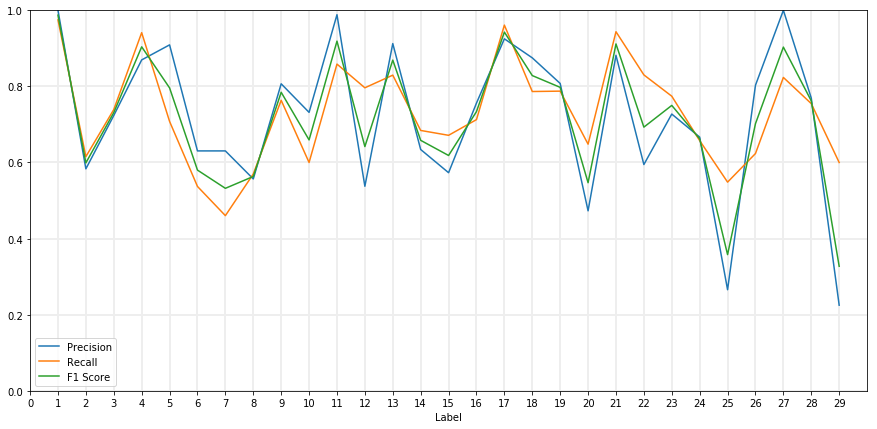

In [59]:
fig, ax = plt.subplots(figsize=(15,7))
labels = np.arange(1, 30)
ax.set_xlabel('Label')

ax.grid(color='#eeeeee', linestyle='-', linewidth=2)
ax.set_xticks(np.arange(0, len(labels)+1, 1))
ax.set_xlim(0, len(labels)+1)
ax.set_ylim(0, 1)

ax.plot(labels, precisions, '-', label='Precision')
ax.plot(labels, recalls, '-', label='Recall')
ax.plot(labels, f1_scores, '-', label='F1 Score')
ax.legend()